In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def gauss_rbf(x,centre,gamma=1):
  return np.exp(-gamma*np.linalg.norm(x-centre)**2)

In [3]:
def end_to_end(x1,x2,y,mu1,mu2):
  phi_1 = [gauss_rbf(i,mu1) for i in zip(x1,x2)]
  phi_2 = [gauss_rbf(i,mu2) for i in zip(x1,x2)]

  plt.figure(figsize=(13,5))
  plt.subplot(1,2,1)
  plt.scatter((x1[0],x1[3]),(x2[0],x2[3]),label="Class_0")
  plt.scatter((x1[1],x1[2]),(x2[1],x2[2]),label="Class_1")
  plt.xlabel("$X1$",fontsize=15)
  plt.ylabel("$X2$",fontsize=15)
  plt.title("XOR: Linearly Seperable",fontsize=15)
  plt.legend()

  plt.subplot(1,2,2)
  plt.scatter(phi_1[0],phi_2[0],label="Class_0")
  plt.scatter(phi_1[1],phi_2[1],label="Class_1")
  plt.scatter(phi_1[2],phi_2[2],label="Class_1")
  plt.scatter(phi_1[3],phi_2[3],label="Class_0")
  plt.plot([0,0.95],[0.95,0],"k--")
  plt.annotate("Seperating Hyperplane",xy=(0.4,0.55),xytext=(0.55,0.66),arrowprops=dict(facecolor="black",shrink=0.05))
  plt.xlabel("$mu1$",fontsize=15)
  plt.ylabel("$mu2$",fontsize=15)
  plt.title("Transformed Inputs: Linearly Seperable",fontsize=15)
  plt.legend()
  plt.show()

  A=[]

  for i,j in zip(phi_1,phi_2):
    temp=[]
    temp.append(i)
    temp.append(j)
    temp.append(1)
    A.append(temp)

  A=np.array(A)
  W=np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
  print(np.round(A.dot(W)))
  print(y)
  print(f"Weights: {W}")
  return W

In [4]:
def predict_matrix(point,weights):
  gauss_rbf_0 = gauss_rbf(point,mu1)
  gauss_rbf_1 = gauss_rbf(point,mu2)
  A = np.array([gauss_rbf_0,gauss_rbf_1,1])
  return np.round(A.dot(weights))

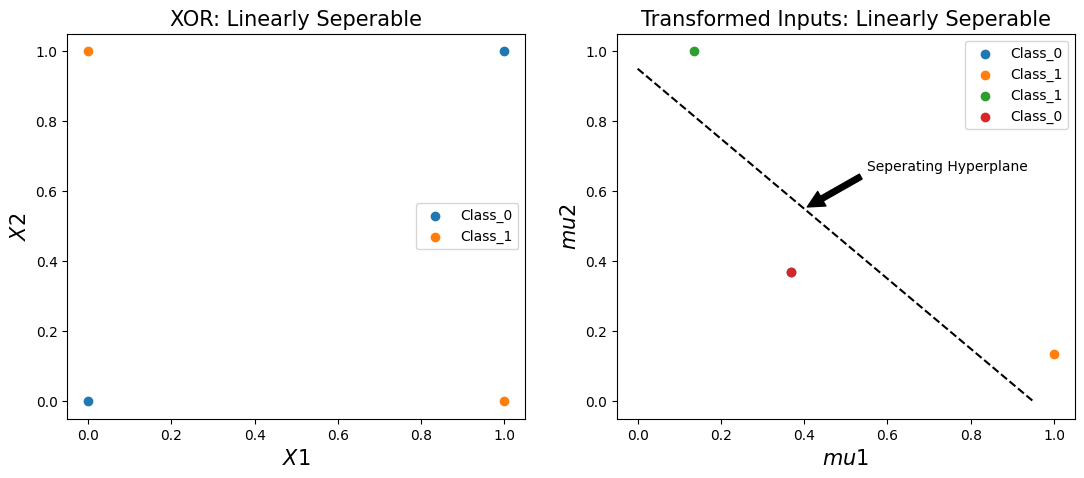

[0. 1. 1. 0.]
[0 1 1 0]
Weights: [ 2.5026503   2.5026503  -1.84134719]


In [5]:
x1=np.array([0,0,1,1])
x2=np.array([0,1,0,1])
y=np.array([0,1,1,0])

mu1=np.array([0,1])
mu2=np.array([1,0])
w=end_to_end(x1,x2,y,mu1,mu2)

In [6]:
print(f"Inputs: {np.array([0,0])}, Predicted: {predict_matrix(np.array([0,0]),w)}")
print(f"Inputs: {np.array([0,1])}, Predicted: {predict_matrix(np.array([0,1]),w)}")
print(f"Inputs: {np.array([1,0])}, Predicted: {predict_matrix(np.array([1,0]),w)}")
print(f"Inputs: {np.array([1,1])}, Predicted: {predict_matrix(np.array([1,1]),w)}")

Inputs: [0 0], Predicted: 0.0
Inputs: [0 1], Predicted: 1.0
Inputs: [1 0], Predicted: 1.0
Inputs: [1 1], Predicted: 0.0
